In [62]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
from xgboost import XGBRegressor
import sklearn
from sklearn import preprocessing
import tensorflow as tf
from keras import layers




In [63]:
# Importing the dataset
dataset = pd.read_csv('C:\Fires\FullDatasetNoArson.csv')


In [64]:
vals = dataset.values

X = dataset.iloc[:,0:8].values
y = dataset.iloc[:, 8].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

dataset.describe()

,LATITUDE,LONGITUDE,Tair_f,Tair_f_min,Tair_f_max,Wind_f,DOY,Humidity,IS_FIRE
count,1.316906e+06,1.316906e+06,1.316906e+06,1.316906e+06,1.316906e+06,1.316906e+06,1.316906e+06,1.316906e+06,1.316906e+06
mean,3.517969e+01,-9.345112e+01,2.902496e+02,2.853949e+02,2.960301e+02,3.725150e+00,1.781752e+02,6.445918e+01,2.475651e-01
std,4.427601e+00,1.618340e+01,9.087236e+00,8.794153e+00,9.525594e+00,1.617672e+00,1.026485e+02,1.921984e+01,4.315979e-01
min,2.537506e+01,-1.242499e+02,2.391047e+02,2.351400e+02,2.444900e+02,1.749286e-01,1.000000e+00,3.094748e+00,0.000000e+00
25%,3.236461e+01,-1.108810e+02,2.838275e+02,2.790699e+02,2.897500e+02,2.594814e+00,9.000000e+01,5.363580e+01,0.000000e+00
50%,3.422694e+01,-8.413550e+01,2.911731e+02,2.860300e+02,2.972000e+02,3.431823e+00,1.760000e+02,6.891118e+01,0.000000e+00
75%,3.727861e+01,-8.117237e+01,2.976779e+02,2.924700e+02,3.032400e+02,4.539546e+00,2.640000e+02,7.878741e+01,0.000000e+00
max,4.887500e+01,-7.262509e+01,3.150400e+02,3.150400e+02,3.224799e+02,1.992163e+01,3.660000e+02,1.095052e+02,1.000000e+00


In [65]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(layers.Dense(units=16, activation='relu', input_shape=(x_train.shape[1],)))


# The Hidden Layers :
NN_model.add(layers.Dense(units=32, activation='relu'))
NN_model.add(layers.Dense(units=128, activation='relu'))

# The Output Layer :
NN_model.add(layers.Dense(units=1, activation='sigmoid'))

#params
opt = tf.keras.optimizers.SGD(
    learning_rate=0.0001, momentum=0.7, nesterov=True, name="SGD")
lossbn = tf.keras.losses.BinaryCrossentropy(
    from_logits=False, label_smoothing=0, reduction="auto", name="binary_crossentropy")
met = tf.keras.metrics.AUC(
    num_thresholds=200,
    curve="ROC",
    summation_method="interpolation",
    name=None,
    dtype=None,
    thresholds=None,
    multi_label=False,
    label_weights=None,
)
# Compile the network :
# Compile neural network
NN_model.compile(loss='binary_crossentropy', # Cross-entropy
                optimizer=opt, # Root Mean Square Propagation
                metrics=['accuracy']) # Accuracy performance metric
NN_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 16)                144       
_________________________________________________________________
dense_28 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_29 (Dense)             (None, 128)               4224      
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 129       
Total params: 5,041
Trainable params: 5,041
Non-trainable params: 0
_________________________________________________________________


In [66]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [67]:
NN_model.fit(x_train, y_train, epochs=15, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)

Train on 790143 samples, validate on 197536 samples
Epoch 1/15
790143/790143 [==============================] - 16s 21us/step - loss: 0.5424 - accuracy: 0.7471 - val_loss: 0.5310 - val_accuracy: 0.7417

Epoch 00001: val_loss improved from inf to 0.53098, saving model to Weights-001--0.53098.hdf5
Epoch 2/15
790143/790143 [==============================] - 16s 20us/step - loss: 0.5157 - accuracy: 0.7541 - val_loss: 0.5160 - val_accuracy: 0.7547

Epoch 00002: val_loss improved from 0.53098 to 0.51595, saving model to Weights-002--0.51595.hdf5
Epoch 3/15
790143/790143 [==============================] - 19s 24us/step - loss: 0.5128 - accuracy: 0.7555 - val_loss: 0.5179 - val_accuracy: 0.7490

Epoch 00003: val_loss did not improve from 0.51595
Epoch 4/15
790143/790143 [==============================] - 17s 21us/step - loss: 0.5111 - accuracy: 0.7558 - val_loss: 0.5091 - val_accuracy: 0.7568

Epoch 00004: val_loss improved from 0.51595 to 0.50906, saving model to Weights-004--0.50906.hdf5
Epo

In [68]:
y_pred = NN_model.predict_classes(x_test)
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [53]:
#convert into binary values
for i in range(0,len(y_pred)):
    if y_pred[i]>=.5:      # setting threshold to .5
        y_pred[i]=1
    else:  
        y_pred[i]=0

In [69]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

#Accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred,y_test)
cm

array([[244288,   3330],
       [ 76446,   5163]], dtype=int64)

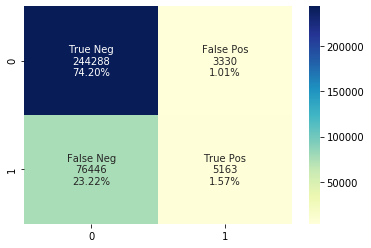

In [70]:
import matplotlib.pyplot as plt  # doctest: +SKIP
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import seaborn as sns

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='YlGnBu')
